<a href="https://colab.research.google.com/github/anabellatus/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NIM**			        : 2241720095

**Nama**			      : Ana Bellatus Mustaqfiro

**Kelas**			      : D4 TI - 3F

**No. Urut**		    : 04

**Mata Kuliah**		  : Pengolahan Citra dan Visi Komputer - Modul 10 (Thresholding,  Segmentasi Sederhana)

## Tugas Praktikum

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

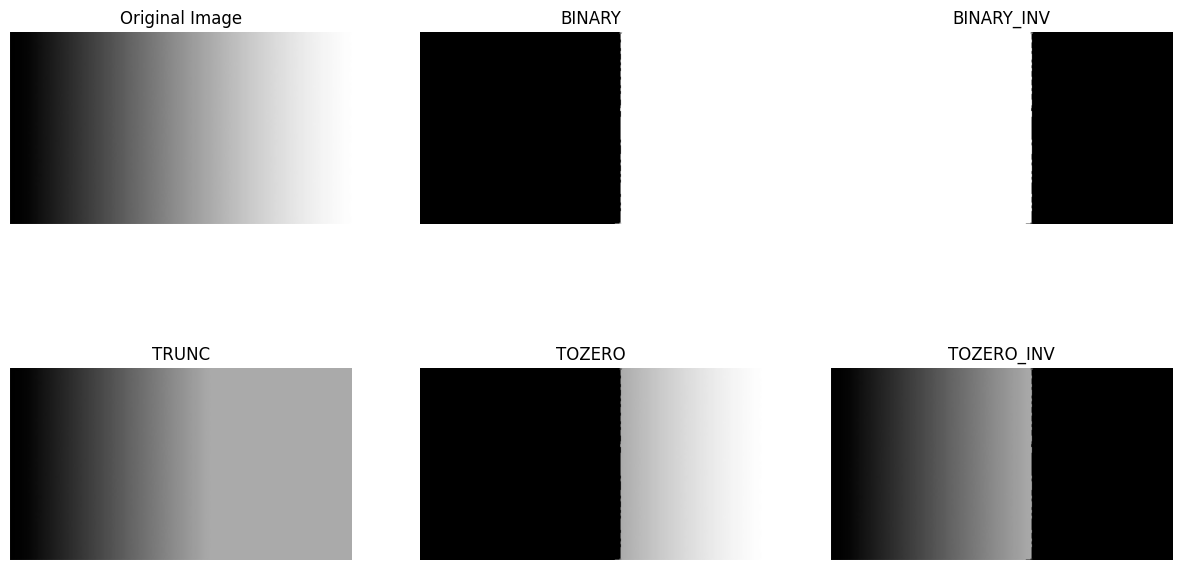

In [26]:
gradient_img = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/gradient.jpg')

threshold = 170

binary = np.where(gradient_img > threshold, 255, 0).astype(np.uint8)

binary_inv = np.where(gradient_img > threshold, 0, 255).astype(np.uint8)

trunc = np.where(gradient_img > threshold, threshold, gradient_img).astype(np.uint8)

to_zero = np.where(gradient_img > threshold, gradient_img, 0).astype(np.uint8)

to_zero_inv = np.where(gradient_img > threshold, 0, gradient_img).astype(np.uint8)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [gradient_img, binary, binary_inv, trunc, to_zero, to_zero_inv]

plt.figure(figsize=(15, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

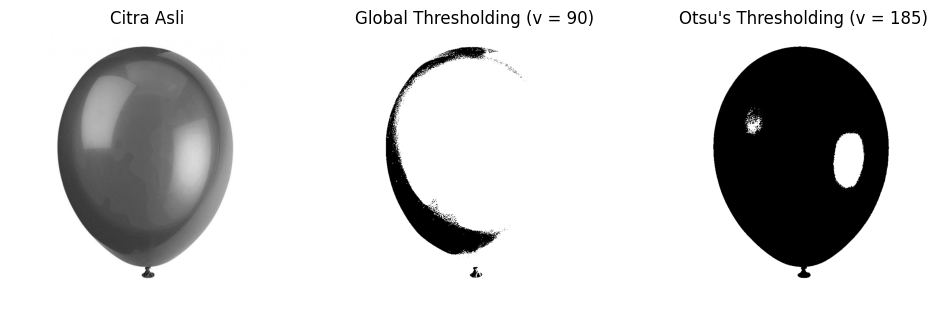

In [28]:
balloon_img = '/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/balloon.jpg'
balloon_gray = cv2.imread(balloon_img, cv2.IMREAD_GRAYSCALE)

def otsu_threshold(image):
    hist, bins = np.histogram(image.ravel(), bins=256, range=(0, 256))

    total_pixels = image.size
    sum_all = np.sum(np.arange(256) * hist)
    sum_background, weight_background, max_variance = 0, 0, 0
    threshold = 0

    for t in range(256):
        weight_background += hist[t]
        if weight_background == 0:
            continue
        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_background += t * hist[t]

        mean_background = sum_background / weight_background
        mean_foreground = (sum_all - sum_background) / weight_foreground

        variance_between = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        if variance_between > max_variance:
            max_variance = variance_between
            threshold = t

    otsu_image = np.where(image >= threshold, 255, 0).astype(np.uint8)
    return threshold, otsu_image

otsu_value, otsu_img = otsu_threshold(balloon_gray)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(balloon_gray, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

global_threshold_value = 90
global_img = np.where(balloon_gray >= global_threshold_value, 255, 0).astype(np.uint8)

plt.subplot(1, 3, 2)
plt.imshow(global_img, cmap='gray')
plt.title(f'Global Thresholding (v = {global_threshold_value})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu_img, cmap='gray')
plt.title(f"Otsu's Thresholding (v = {otsu_value})")
plt.axis('off')

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

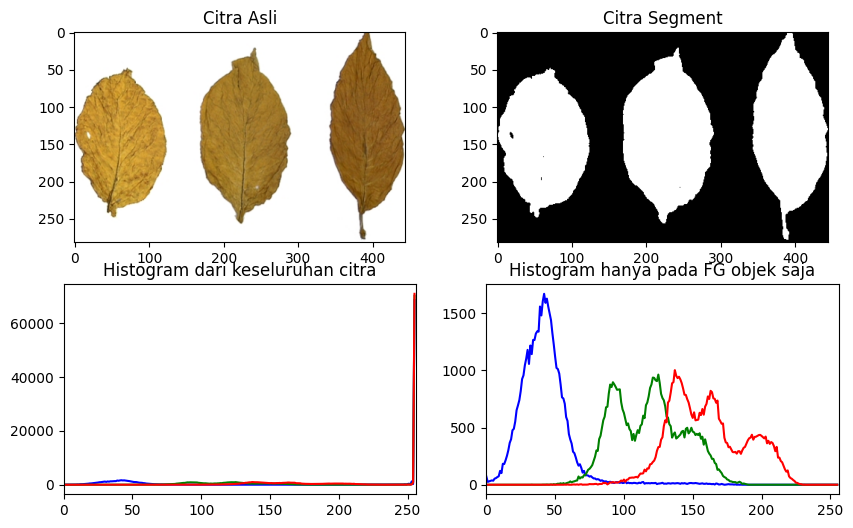

In [37]:
tobacco_img = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/tobacco.jpg')

gray = cv2.cvtColor(tobacco_img, cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(tobacco_img, cv2.COLOR_BGR2RGB))
plt.title("Citra Asli")

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Citra Segment")

plt.subplot(2, 2, 3)
for i, color in enumerate(colors):
    hist_full = cv2.calcHist([tobacco_img], [i], None, [256], [0, 256])
    plt.plot(hist_full, color=color)
    plt.xlim([0, 256])
plt.title("Histogram dari keseluruhan citra")

plt.subplot(2, 2, 4)
for i, color in enumerate(colors):
    hist_fg = cv2.calcHist([tobacco_img], [i], mask, [256], [0, 256])
    plt.plot(hist_fg, color=color)
    plt.xlim([0, 256])
plt.title("Histogram hanya pada FG objek saja")

plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

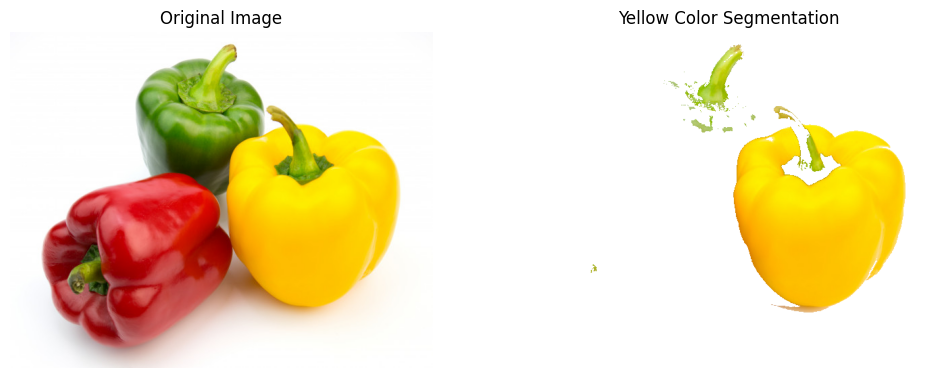

In [43]:
peppers_img = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/peppers.jpg')
peppers_rgb = cv2.cvtColor(peppers_img, cv2.COLOR_BGR2RGB)

pixel_values = peppers_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = centers[labels].reshape(peppers_rgb.shape)

yellow_cluster = np.argmin(np.linalg.norm(centers - [255, 255, 0], axis=1))
masked_image = np.copy(peppers_rgb).reshape((-1, 3))
masked_image[labels != yellow_cluster] = [255, 255, 255]
masked_image = masked_image.reshape(peppers_rgb.shape)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(peppers_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Yellow Color Segmentation")
plt.imshow(masked_image)
plt.axis('off')

plt.show()

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

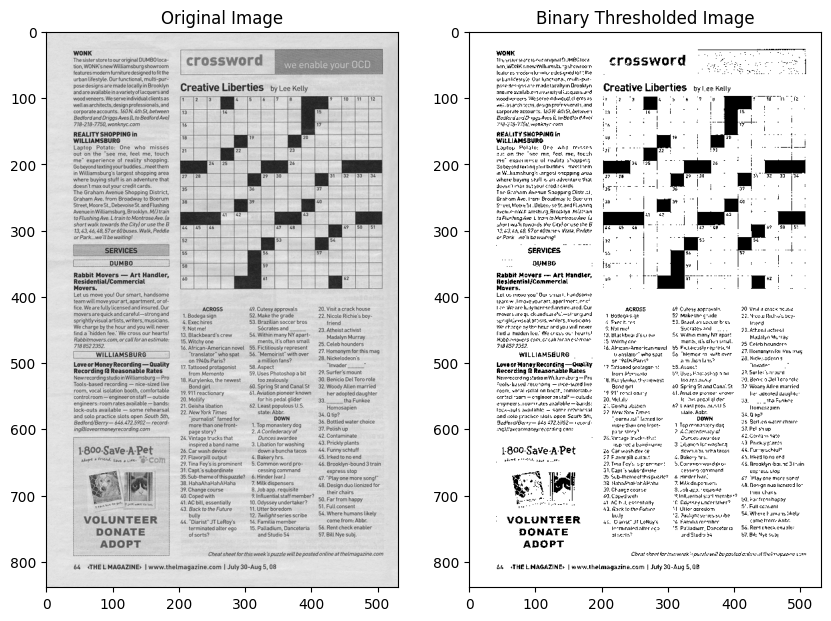

In [45]:
crossword_img = cv2.imread('/content/drive/MyDrive/UniLife/Semester5/PCVK/assets/Images/crossword.jpg', cv2.IMREAD_GRAYSCALE)

_, thresholded_image = cv2.threshold(crossword_img, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(crossword_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Binary Thresholded Image')
plt.imshow(thresholded_image, cmap='gray')
plt.show()

Link Repo
[Week 10](https://github.com/anabellatus/PCVK_Ganjil_2024/blob/main/Week10.ipynb)